In [72]:
#!pip install xgboost

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb


In [74]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [75]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [76]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<AxesSubplot:>

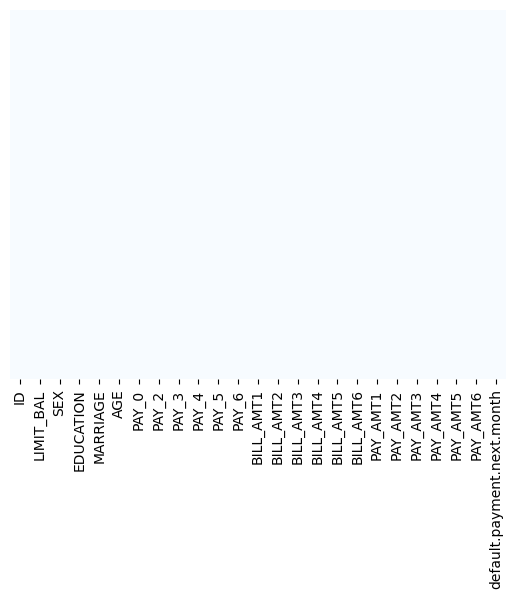

In [77]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


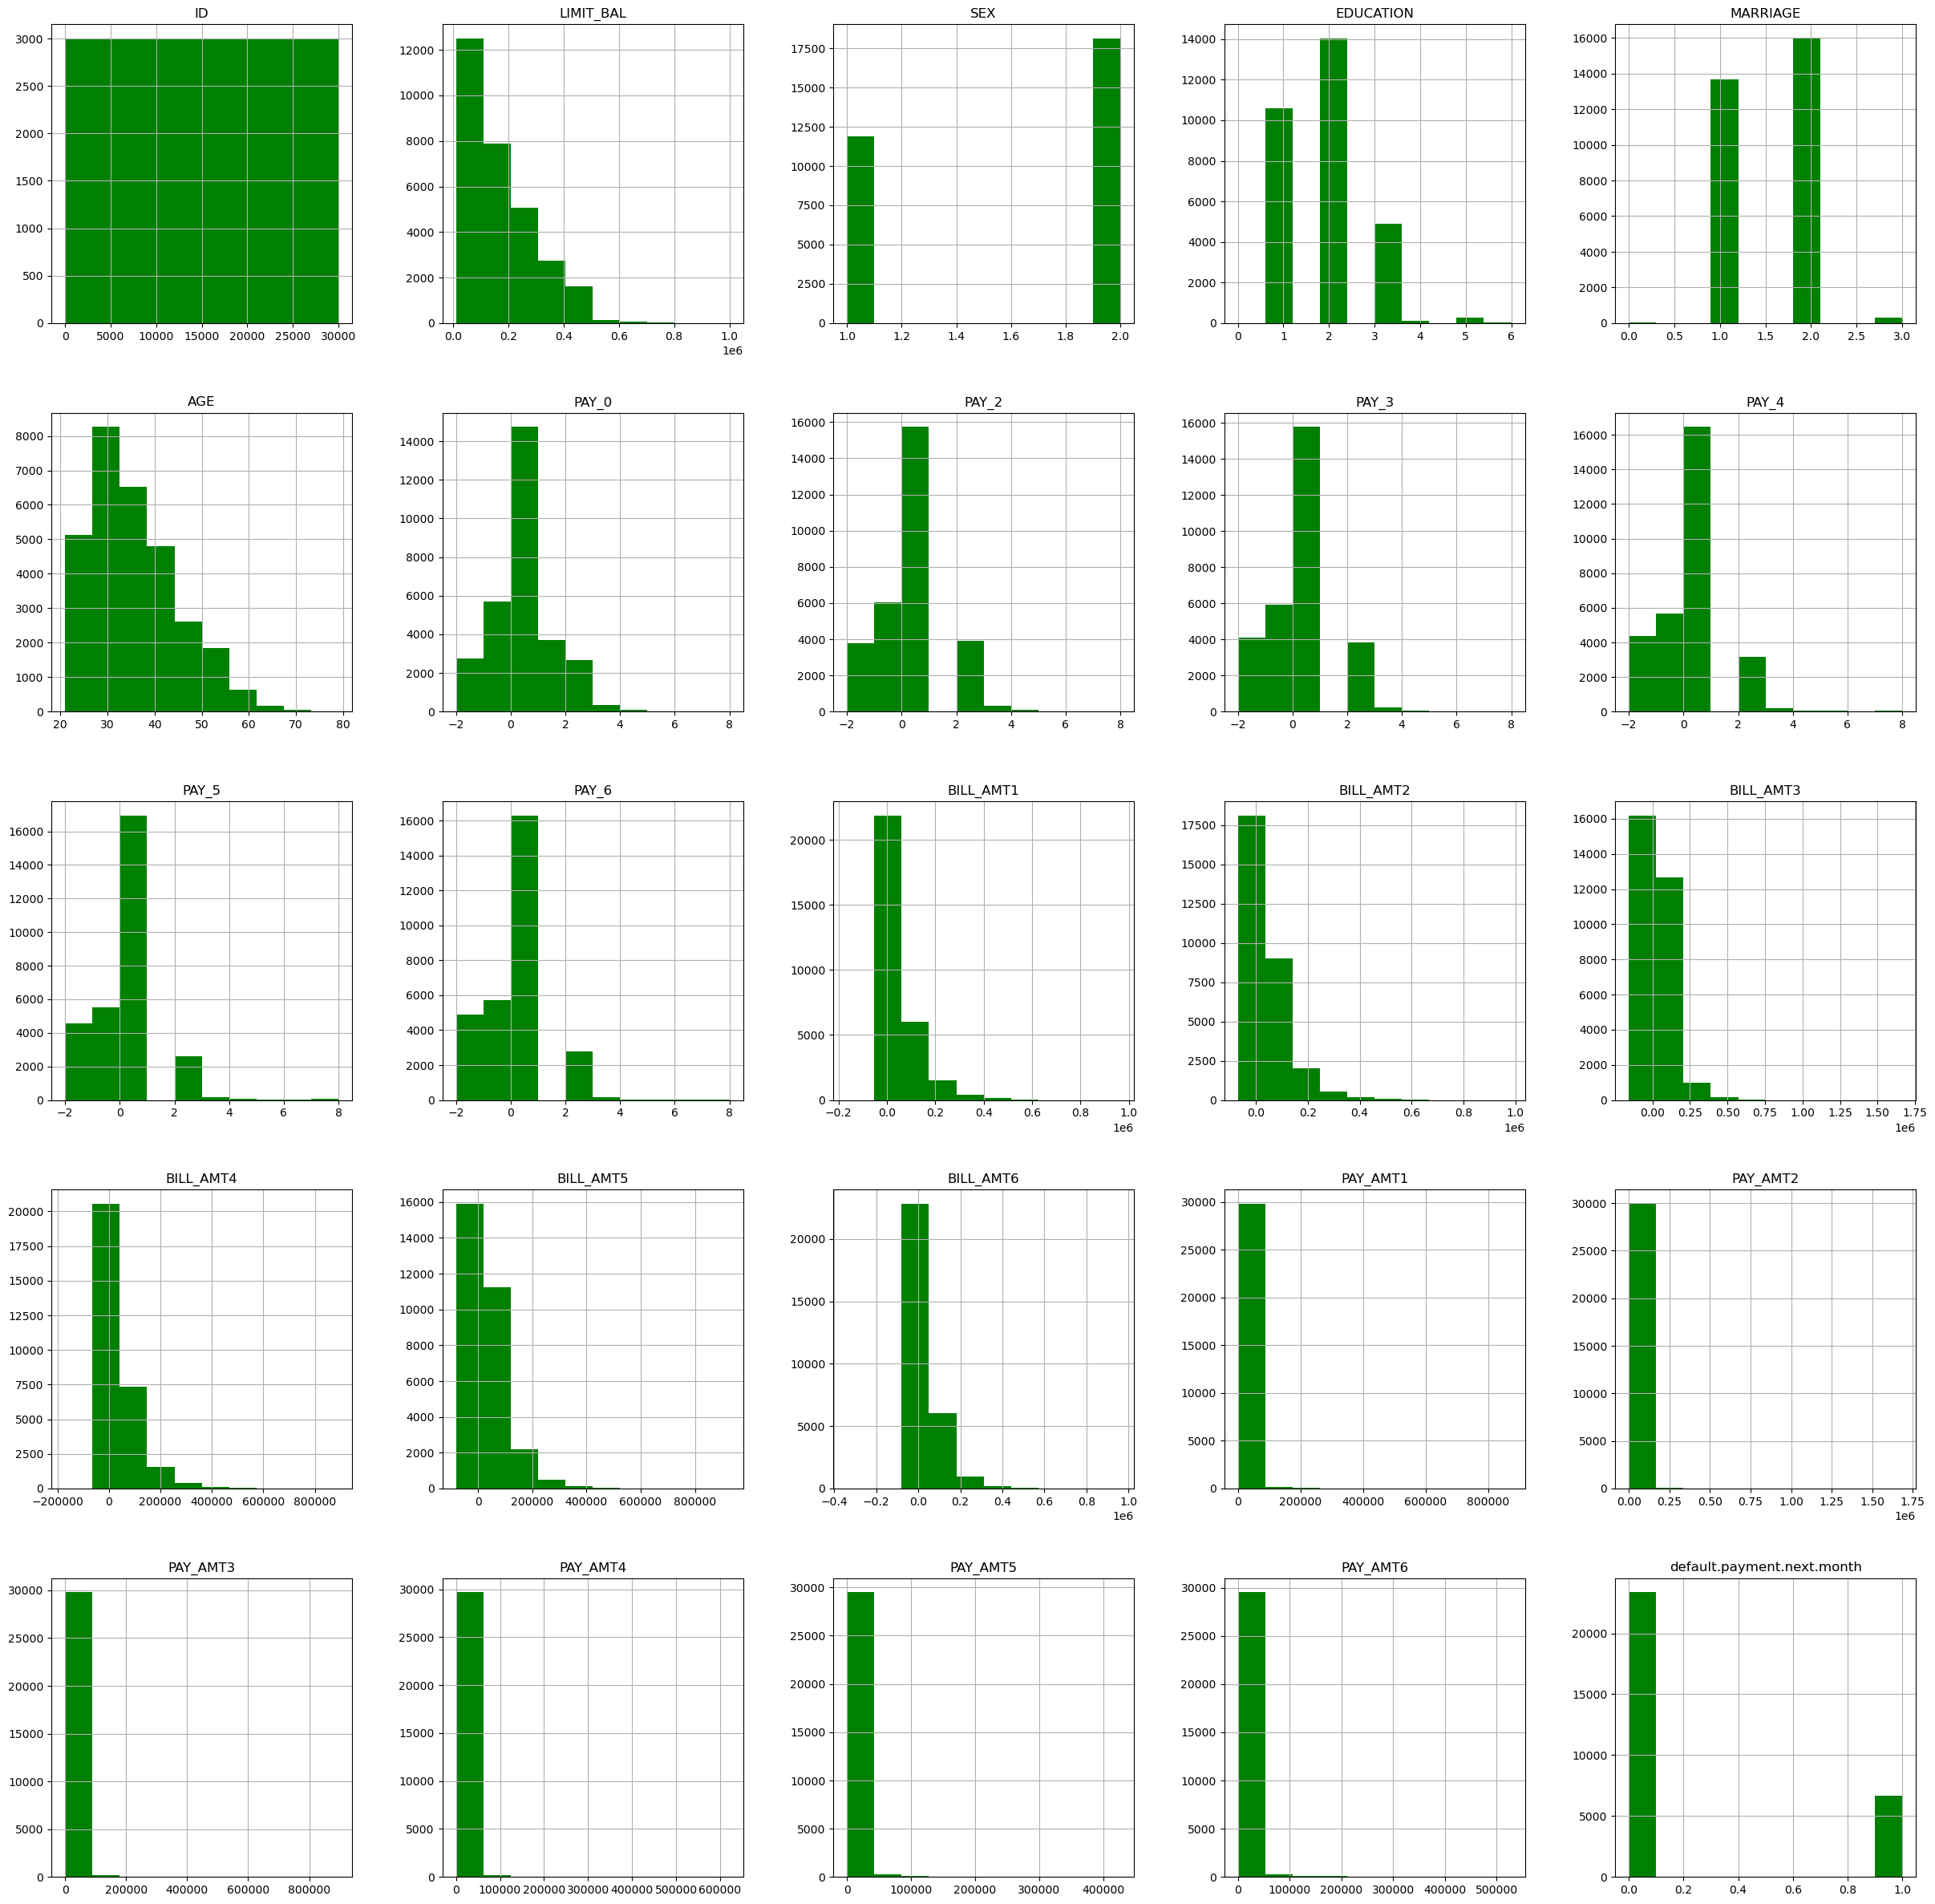

In [78]:
df.hist(figsize =(30,30), color = 'g');

## Comparing statistics between deafult and nodefault customers

In [79]:
# Let's see how many customers could potentially default on their credit card payment! 
default_df        = df[df['default.payment.next.month'] == 1]
nodefault_df      = df[df['default.payment.next.month'] == 0]

print(default_df.shape[0])
print(nodefault_df.shape[0])

6636
23364


In [80]:
#Imbalanced dataset 

print("Total =", len(df))
print('')
print("Number of customers who defaulted on their credit card payments =", len(default_df))
print("Percentage of customers who defaulted on their credit card payments =", 1.*len(default_df)/len(df)*100.0, "%")
print('')
print("Number of customers who did not default on their credit card payments (paid their balance)=", len(nodefault_df))
print("Percentage of customers who did not default on their credit card payments (paid their balance)=", 1.*len(nodefault_df)/len(df)*100.0, "%")

Total = 30000

Number of customers who defaulted on their credit card payments = 6636
Percentage of customers who defaulted on their credit card payments = 22.12 %

Number of customers who did not default on their credit card payments (paid their balance)= 23364
Percentage of customers who did not default on their credit card payments (paid their balance)= 77.88000000000001 %


In [81]:
# Let's compare the mean and std of the customers who stayed and left 
default_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,8571.616622,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7408.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,14758.500000,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,21831.750000,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,30000.000000,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [82]:
# Let's compare the mean and std of the customers who stayed and left 
nodefault_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,8684.552145,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,7526.750000,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,15073.500000,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,22637.250000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,29997.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


<AxesSubplot:>

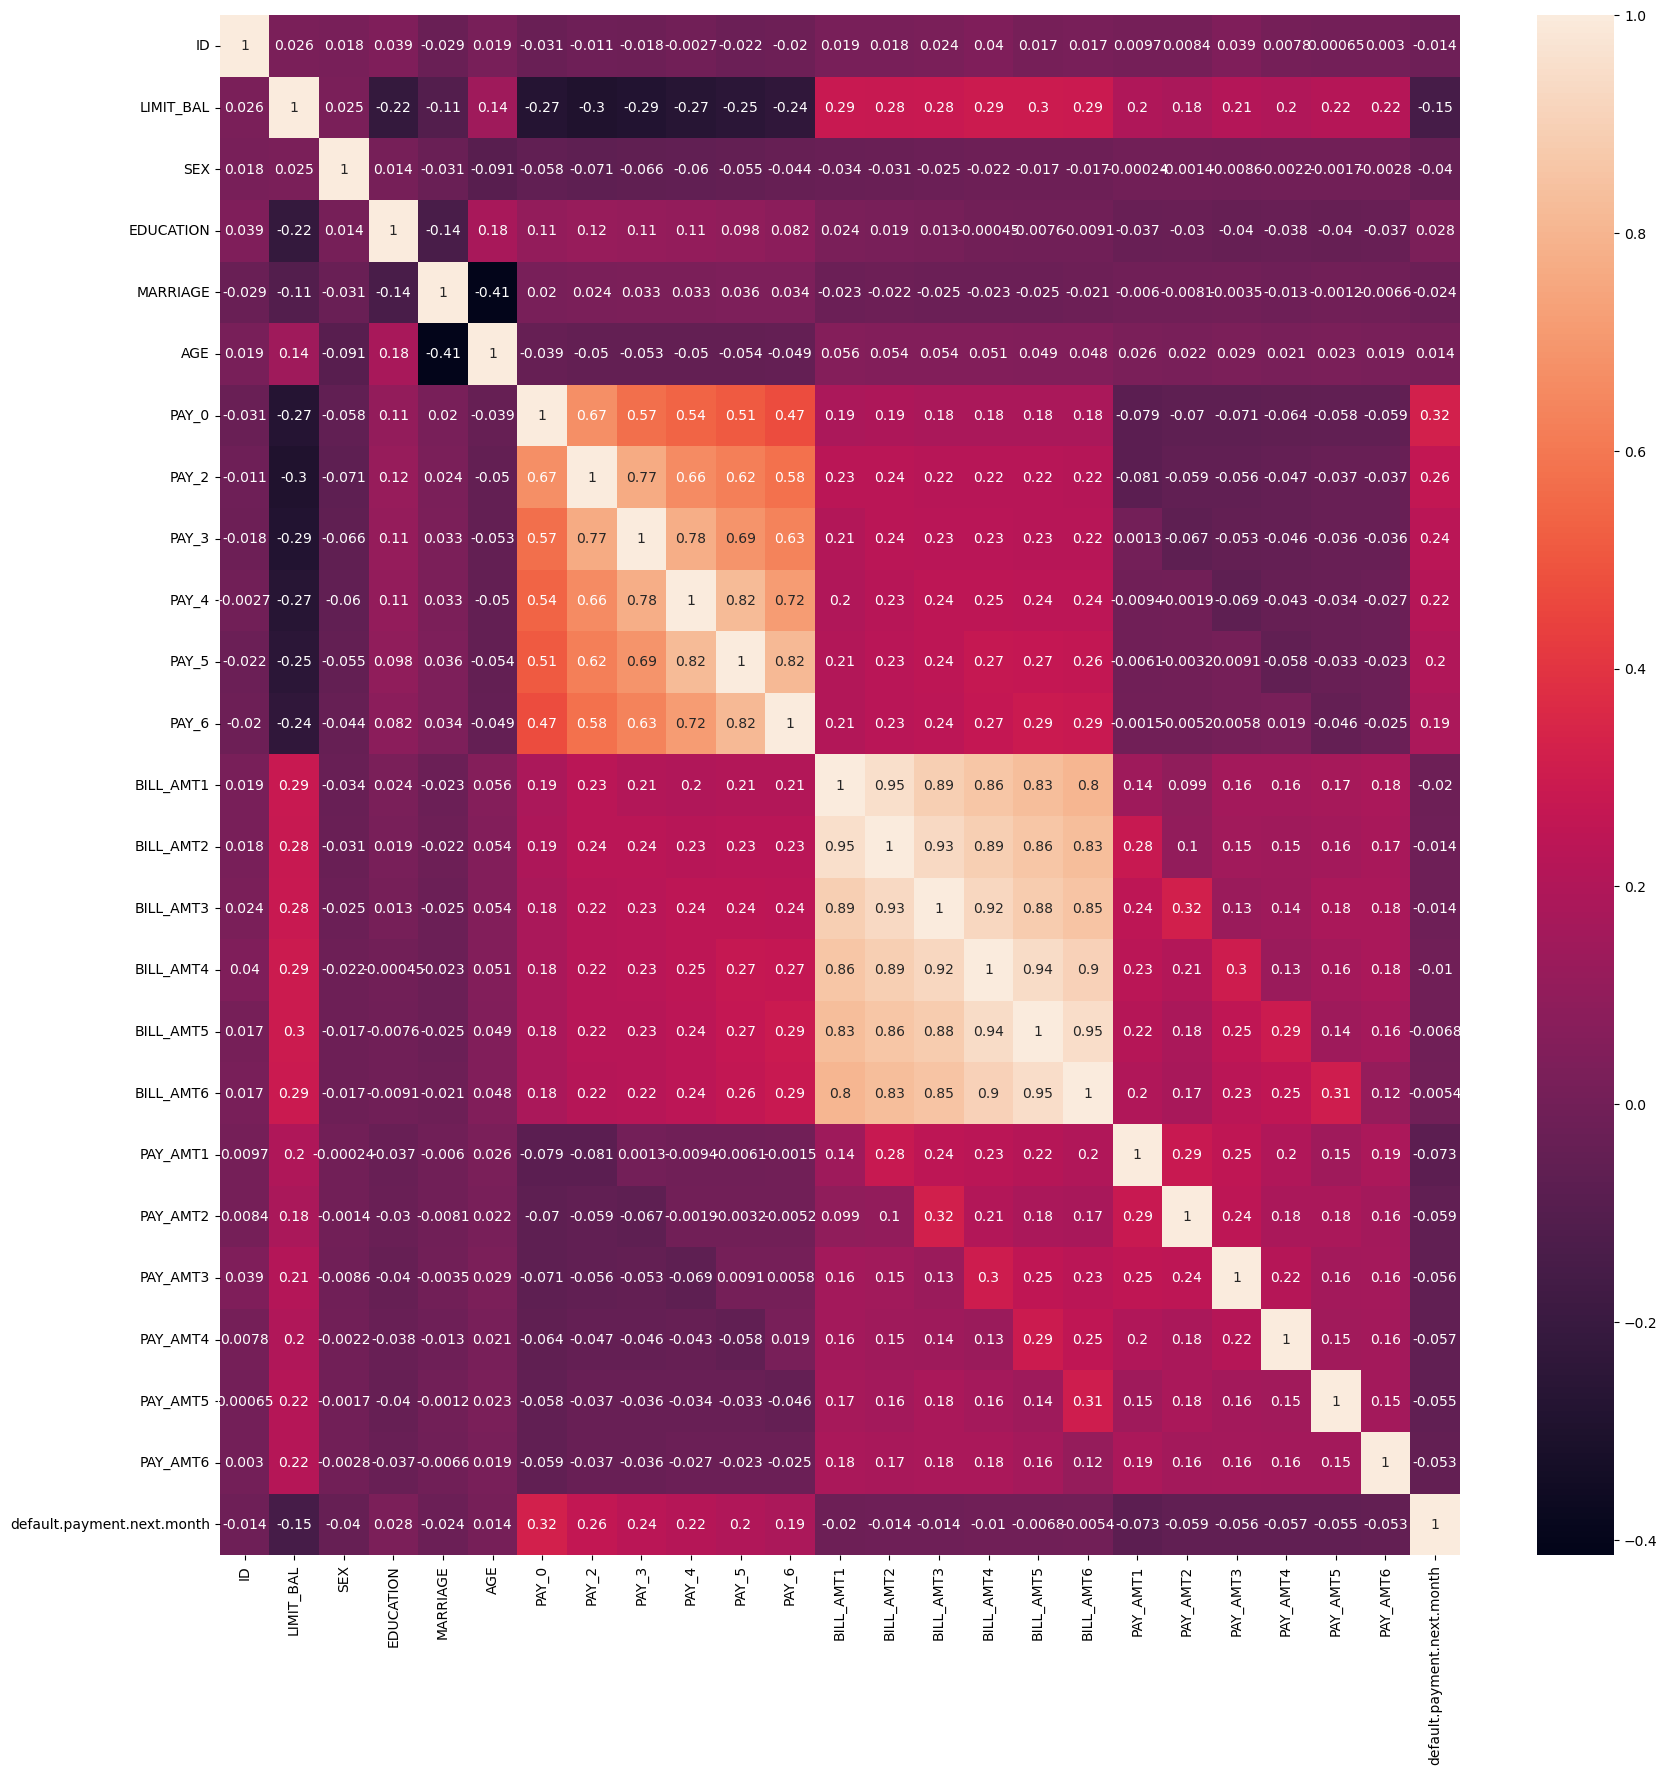

In [83]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)


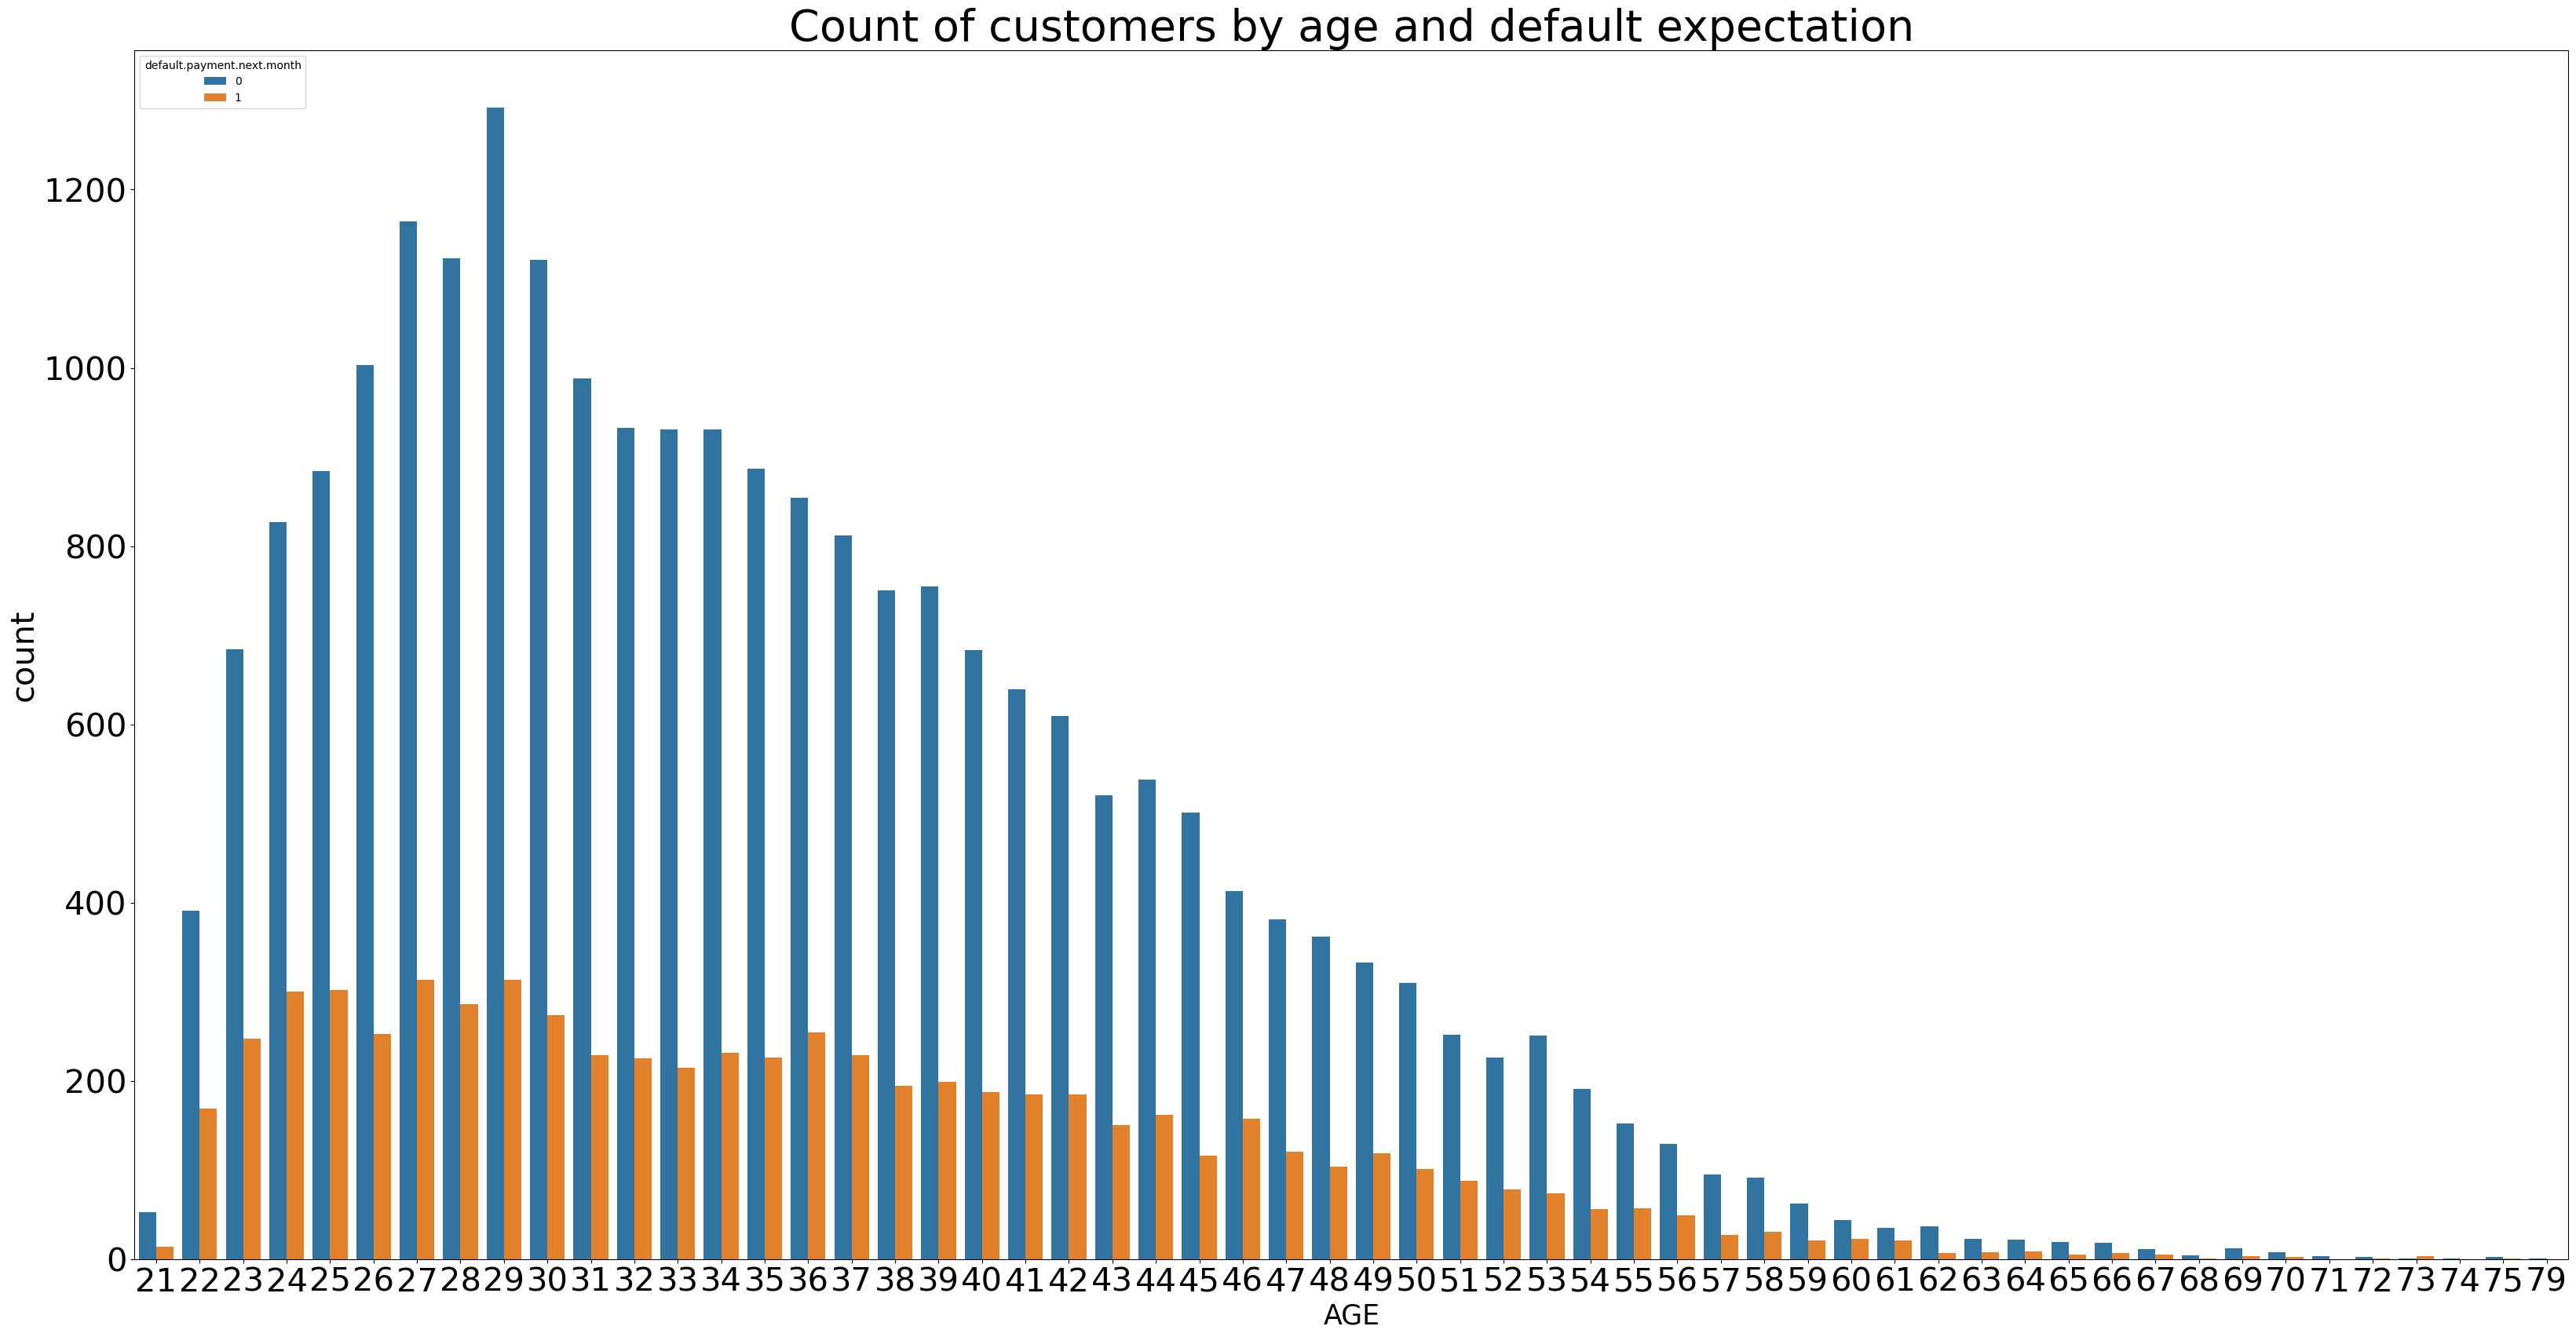

In [84]:
plt.figure(figsize=[40, 20])
plt.title('Count of customers by age and default expectation',fontsize = 40)
plt.xlabel('xlabel', fontsize=25)
plt.xticks(fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.yticks(fontsize=30)
sns.countplot(x = 'AGE', hue = 'default.payment.next.month', data = df)
plt.show()

###        *Customers in their 20s tend to deafult more*


<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

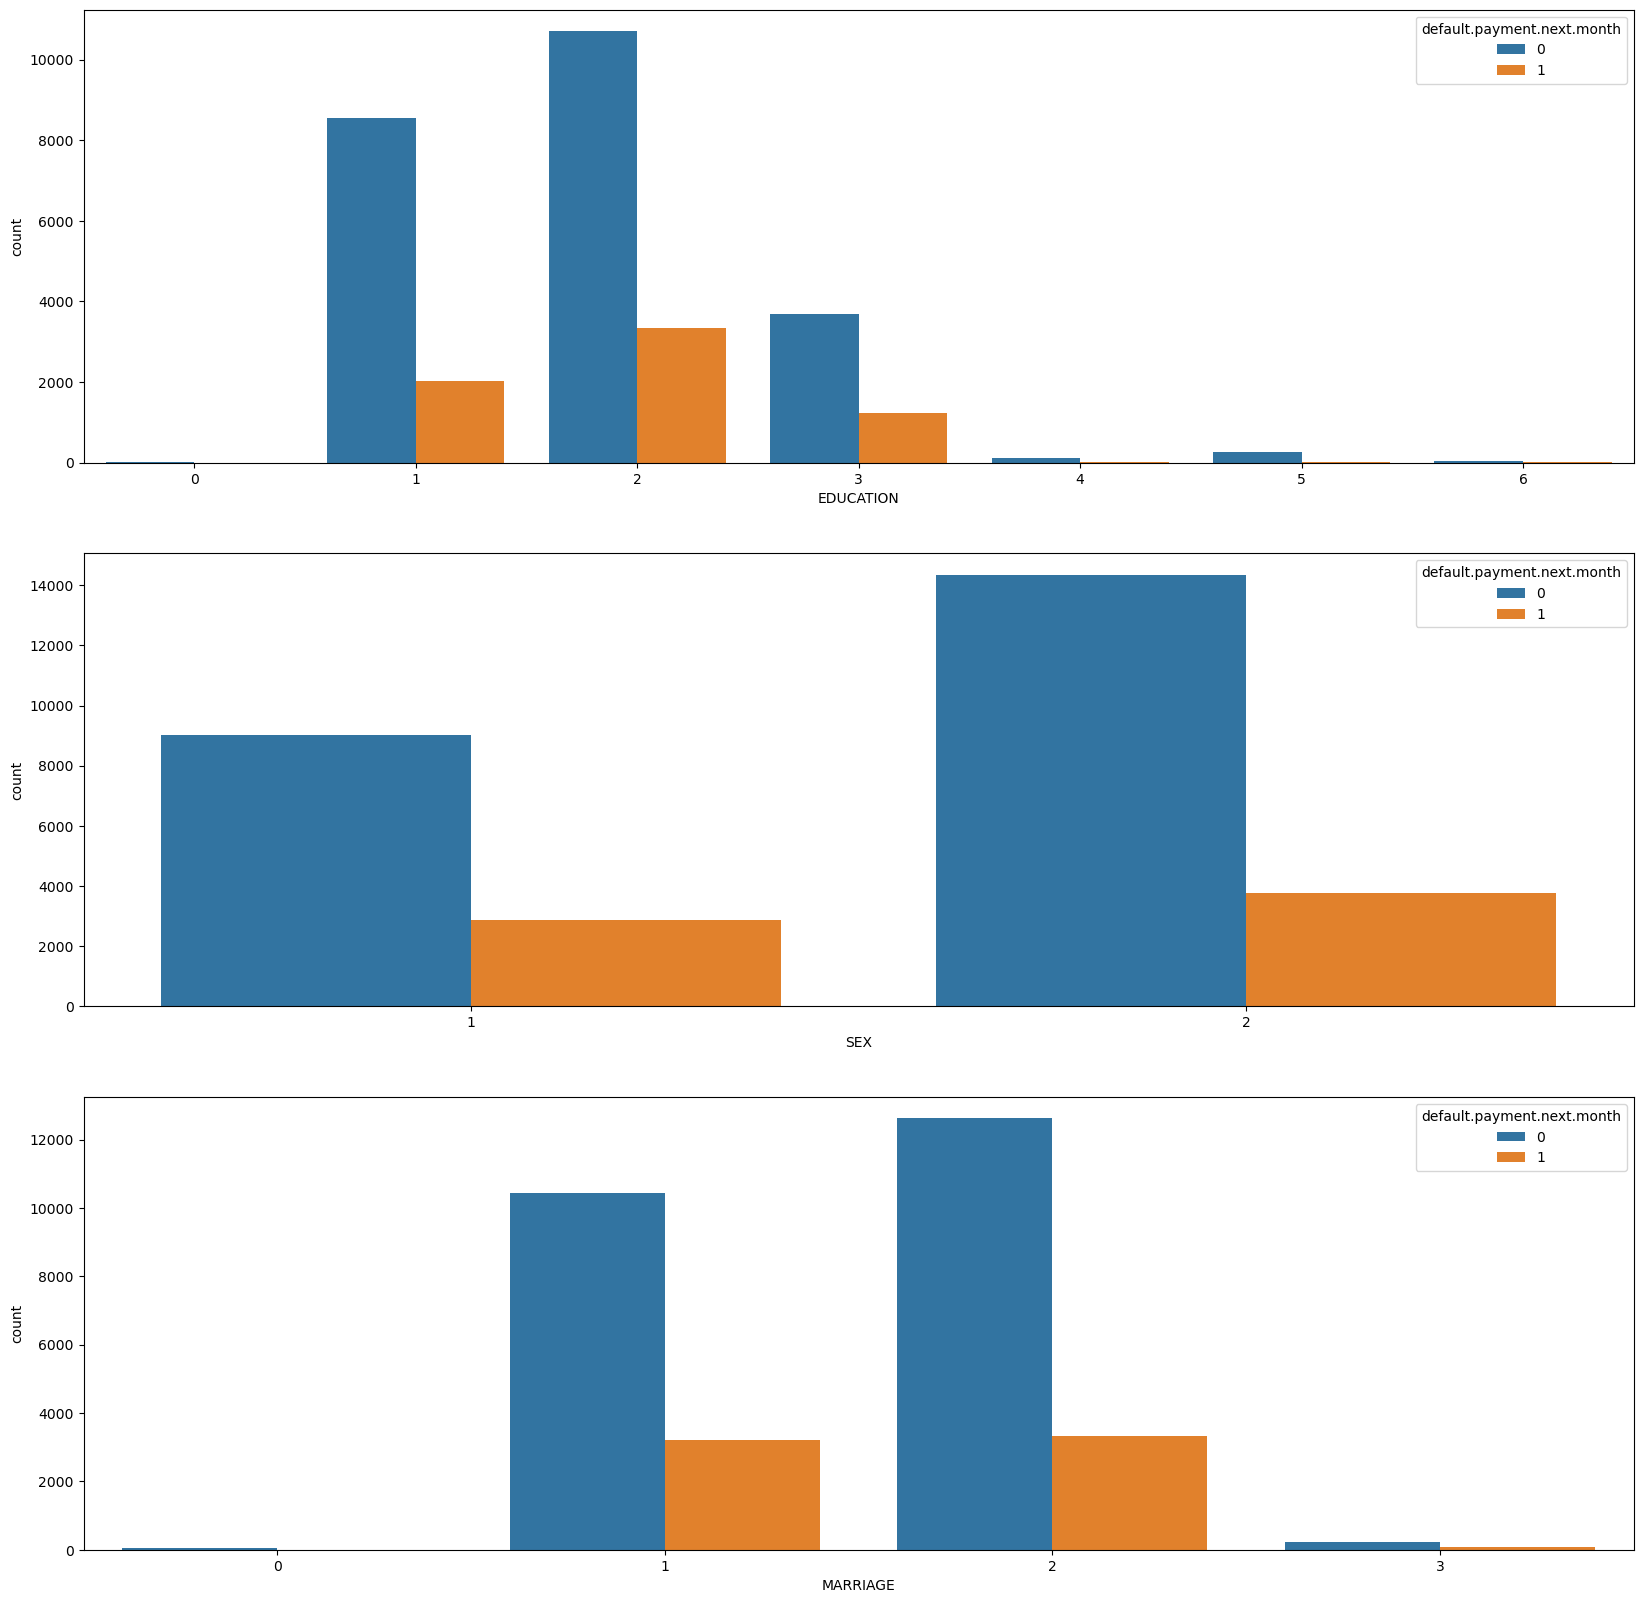

In [85]:
plt.figure(figsize=[20,20])
plt.subplot(311)
sns.countplot(x = 'EDUCATION', hue = 'default.payment.next.month', data = df)
plt.subplot(312)
sns.countplot(x = 'SEX', hue = 'default.payment.next.month', data = df)
plt.subplot(313)
sns.countplot(x = 'MARRIAGE', hue = 'default.payment.next.month', data = df)


In [86]:
# higher education, less probability of default
# Males have higher expectation of default
#married applicanys have lower deafault expectation

(0.0, 200000.0)

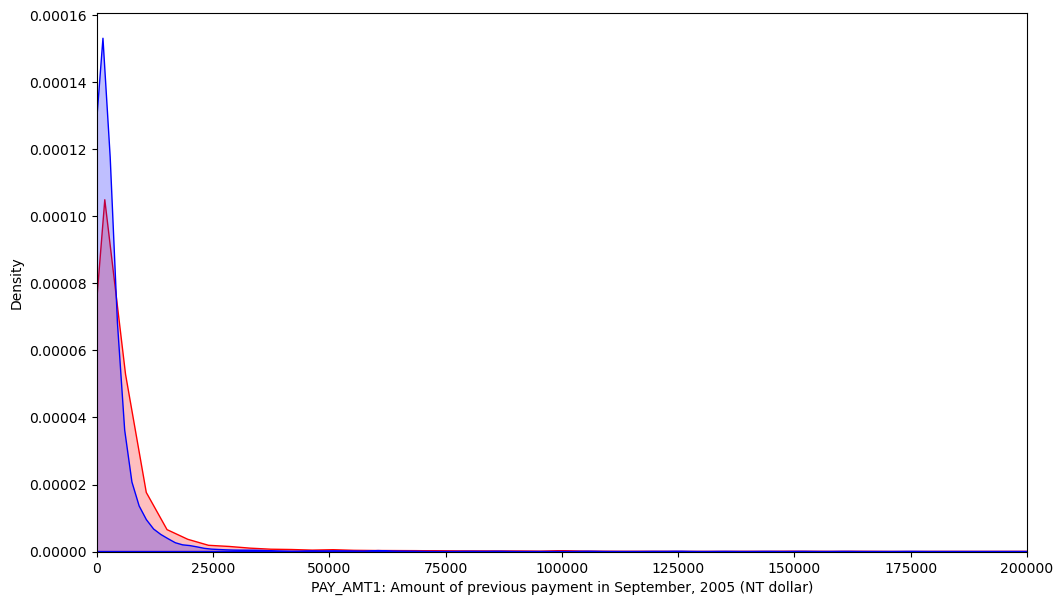

In [88]:
#visualizing the Probability Density of a continuous variable. 

plt.figure(figsize=(12,7))

sns.kdeplot(nodefault_df['PAY_AMT1'], label = 'Customers who did not default (paid balance)', shade = True, color = 'r')
sns.kdeplot(default_df['PAY_AMT1'], label = 'Customers who defaulted (did not pay balance)', shade = True, color = 'b')

plt.xlabel('PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)')
plt.xlim(0, 200000)


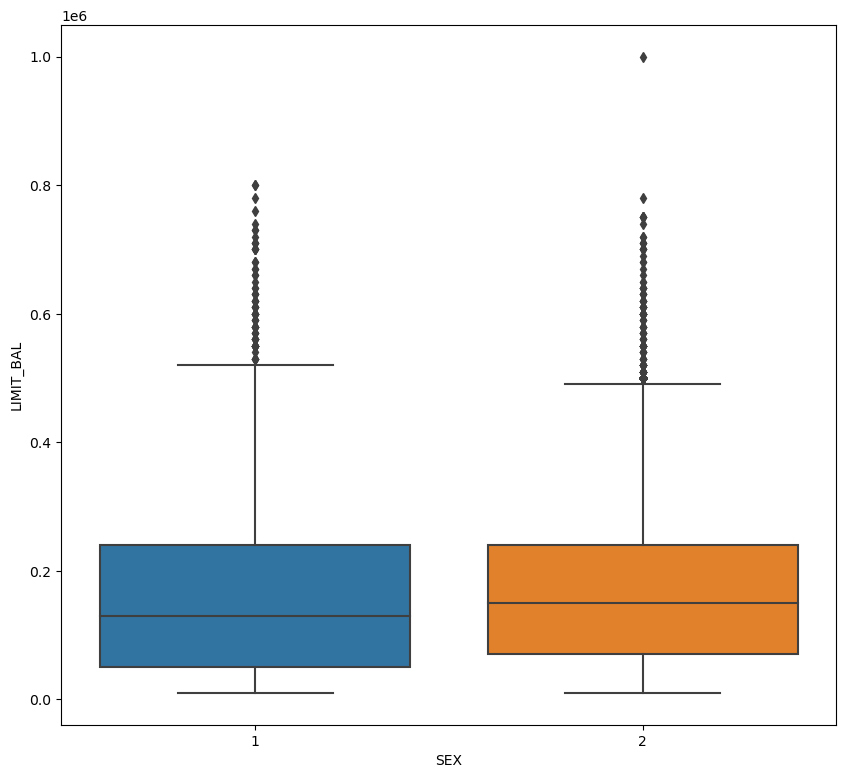

In [123]:
#impact of sex on the amount of credit given

plt.figure(figsize=[10,20])
#plt.subplot(211)
#sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = df)
plt.show()

In [ ]:
#Female customers are offered larger loans

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

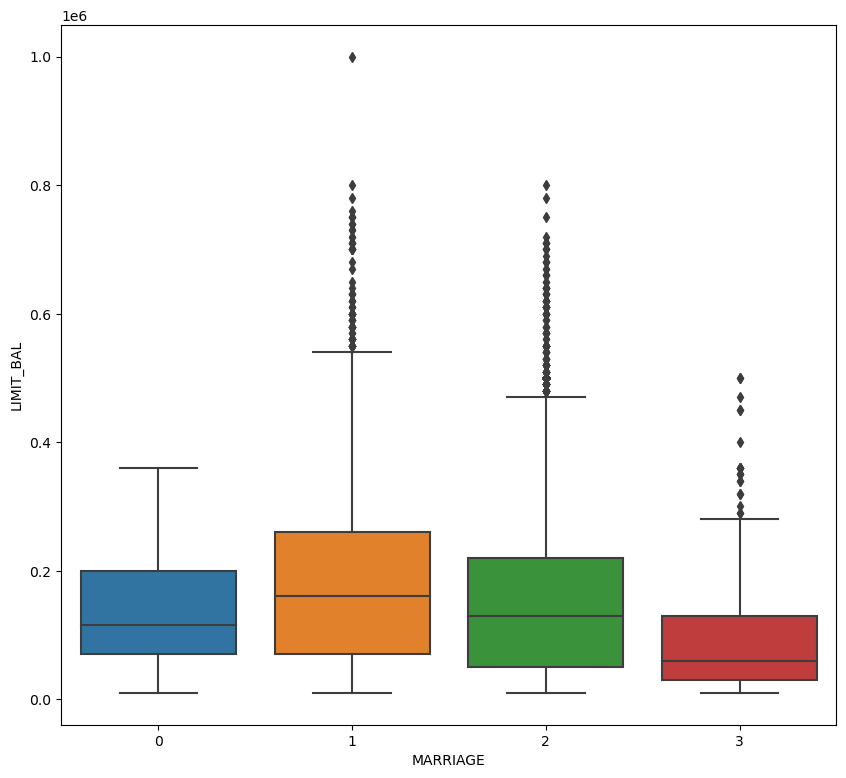

In [122]:
plt.figure(figsize=[10,20])
#plt.subplot(211)
#sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = df)



In [ ]:
# Married people have are offered bigger loans

## Model

In [91]:
X_cat = df[['SEX', 'EDUCATION', 'MARRIAGE']]
# note that we dropped the target 'default.payment.next.month'
X_numerical = df.loc[:, ~df.columns.isin(X_cat.columns)].drop('default.payment.next.month', axis=1)
X_all = pd.concat([X_cat, X_numerical], axis = 1)


In [92]:
# One hot encoding on categorical variables
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)


y = df['default.payment.next.month']


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [94]:
model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='reg:squarederror',
              predictor='auto', ...)

In [95]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 81.62666666666667 %


In [96]:
from sklearn.metrics import confusion_matrix, classification_report


<AxesSubplot:>

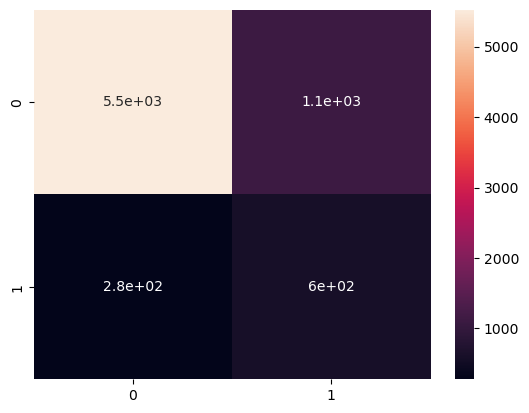

In [97]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5802
           1       0.68      0.35      0.46      1698

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.80      0.82      0.79      7500



## HYPERPARAMETER TUNUNING BY PERFORMING GRID SEARCH

In [99]:
param_grid = {
        'gamma': [0.5, 1, 5],   # regularization parameter 
        'subsample': [0.6, 0.8, 1.0], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
        'max_depth': [3, 4, 5] # depth of each tree
        }

In [102]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.823 total time=   0.2s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.820 total time=   0.2s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.816 total time=   0.2s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.821 total time=   0.2s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.827 total time=   0.2s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.824 total time=   0.2s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.821 total time=   0.2s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.817 total time=   0.2s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.821 tot

[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.6;, score=0.822 total time=   0.3s
[CV 5/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.6;, score=0.830 total time=   0.4s
[CV 1/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.8;, score=0.822 total time=   0.4s
[CV 2/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.8;, score=0.821 total time=   0.4s
[CV 3/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.8;, score=0.815 total time=   0.4s
[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.8;, score=0.823 total time=   0.4s
[CV 5/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.8;, score=0.826 total time=   0.4s
[CV 1/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=1.0;, score=0.822 total time=   0.4s
[CV 2/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=1.0;, score=0.819 total time=   0.4s
[CV 3/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsamp

[CV 3/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, subsample=0.8;, score=0.819 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, subsample=0.8;, score=0.825 total time=   0.3s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, subsample=0.8;, score=0.827 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, subsample=1.0;, score=0.824 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, subsample=1.0;, score=0.821 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, subsample=1.0;, score=0.819 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, subsample=1.0;, score=0.824 total time=   0.3s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, max_depth=4, subsample=1.0;, score=0.827 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, max_depth=5, subsample=0.6;, score=0.822 total time=   0.4s
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, 

[CV 2/5] END colsample_bytree=0.8, gamma=5, max_depth=3, subsample=1.0;, score=0.821 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, gamma=5, max_depth=3, subsample=1.0;, score=0.820 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, gamma=5, max_depth=3, subsample=1.0;, score=0.827 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, gamma=5, max_depth=3, subsample=1.0;, score=0.828 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, gamma=5, max_depth=4, subsample=0.6;, score=0.822 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, gamma=5, max_depth=4, subsample=0.6;, score=0.821 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, gamma=5, max_depth=4, subsample=0.6;, score=0.820 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, gamma=5, max_depth=4, subsample=0.6;, score=0.826 total time=   0.3s
[CV 5/5] END colsample_bytree=0.8, gamma=5, max_depth=4, subsample=0.6;, score=0.828 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, gamma=5, max_depth=4, subsamp

[CV 5/5] END colsample_bytree=1.0, gamma=0.5, max_depth=5, subsample=1.0;, score=0.826 total time=   0.4s
[CV 1/5] END colsample_bytree=1.0, gamma=1, max_depth=3, subsample=0.6;, score=0.822 total time=   0.3s
[CV 2/5] END colsample_bytree=1.0, gamma=1, max_depth=3, subsample=0.6;, score=0.820 total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, gamma=1, max_depth=3, subsample=0.6;, score=0.820 total time=   0.3s
[CV 4/5] END colsample_bytree=1.0, gamma=1, max_depth=3, subsample=0.6;, score=0.825 total time=   0.3s
[CV 5/5] END colsample_bytree=1.0, gamma=1, max_depth=3, subsample=0.6;, score=0.826 total time=   0.3s
[CV 1/5] END colsample_bytree=1.0, gamma=1, max_depth=3, subsample=0.8;, score=0.822 total time=   0.3s
[CV 2/5] END colsample_bytree=1.0, gamma=1, max_depth=3, subsample=0.8;, score=0.822 total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, gamma=1, max_depth=3, subsample=0.8;, score=0.820 total time=   0.3s
[CV 4/5] END colsample_bytree=1.0, gamma=1, max_depth=3, subsa

[CV 4/5] END colsample_bytree=1.0, gamma=5, max_depth=5, subsample=0.6;, score=0.824 total time=   0.5s
[CV 5/5] END colsample_bytree=1.0, gamma=5, max_depth=5, subsample=0.6;, score=0.828 total time=   0.5s
[CV 1/5] END colsample_bytree=1.0, gamma=5, max_depth=5, subsample=0.8;, score=0.821 total time=   0.5s
[CV 2/5] END colsample_bytree=1.0, gamma=5, max_depth=5, subsample=0.8;, score=0.822 total time=   0.5s
[CV 3/5] END colsample_bytree=1.0, gamma=5, max_depth=5, subsample=0.8;, score=0.818 total time=   0.5s
[CV 4/5] END colsample_bytree=1.0, gamma=5, max_depth=5, subsample=0.8;, score=0.825 total time=   0.5s
[CV 5/5] END colsample_bytree=1.0, gamma=5, max_depth=5, subsample=0.8;, score=0.826 total time=   0.5s
[CV 1/5] END colsample_bytree=1.0, gamma=5, max_depth=5, subsample=1.0;, score=0.822 total time=   0.4s
[CV 2/5] END colsample_bytree=1.0, gamma=5, max_depth=5, subsample=1.0;, score=0.821 total time=   0.4s
[CV 3/5] END colsample_bytree=1.0, gamma=5, max_depth=5, subsamp

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_

In [120]:
y_predict_optim = grid.predict(X_test)

<AxesSubplot:>

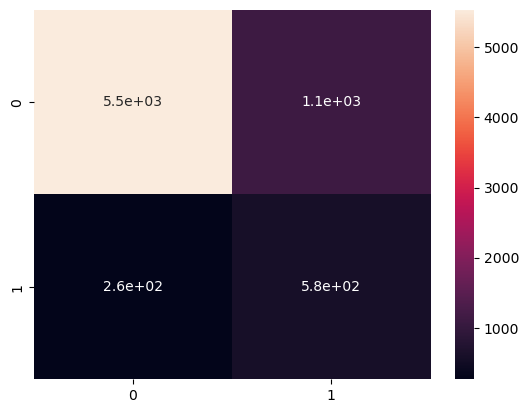

In [117]:
# Testing Set Performance
cm = confusion_matrix(y_predict_optim, y_test)
sns.heatmap(cm, annot=True)

In [121]:
print(classification_report(y_test, y_predict_optim))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89      5802
           1       0.66      0.36      0.46      1698

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.68      7500
weighted avg       0.79      0.81      0.79      7500



In [124]:
print("Accuracy {} %".format( 100 * accuracy_score(y_predict_optim, y_test)))

Accuracy 81.21333333333334 %
